In [ ]:
# Load necessary libraries
install.packages("randomForest")
install.packages("e1071")
install.packages("ROCR")
install.packages("pROC")
install.packages("gridExtra")
install.packages("glmnet")


library(tidyverse)       # For data manipulation and ggplot2 for plottin
library(rpart)           # For Decision Tree
library(randomForest)    # For Random Forest
library(e1071)           # For SVM (also needed by caret)
library(ROCR)            # For ROC curve and AUC
library(pROC)            # Another option for ROC/AUC
library(gridExtra)       # For arranging multiple ggplots
library(glmnet)          # For Logistic Regression and Lasso/Ridge
library(warn.conflicts = FALSE)

# Suppress warnings
options(warn = -1)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
──

In [ ]:
data <- read.csv("/content/Student Mental health.csv")
head(data)

,Timestamp,Choose.your.gender,Age,What.is.your.course.,Your.current.year.of.Study,What.is.your.CGPA.,Marital.status,Do.you.have.Depression.,Do.you.have.Anxiety.,Do.you.have.Panic.attack.,Did.you.seek.any.specialist.for.a.treatment.
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
2,8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
3,8/7/2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
4,8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
5,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
6,8/7/2020 12:31,Male,19,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No


In [ ]:
str(data)

'data.frame':	101 obs. of  11 variables:
 $ Timestamp                                   : chr  "8/7/2020 12:02" "8/7/2020 12:04" "8/7/2020 12:05" "8/7/2020 12:06" ...
 $ Choose.your.gender                          : chr  "Female" "Male" "Male" "Female" ...
 $ Age                                         : int  18 21 19 22 23 19 23 18 19 18 ...
 $ What.is.your.course.                        : chr  "Engineering" "Islamic education" "BIT" "Laws" ...
 $ Your.current.year.of.Study                  : chr  "year 1" "year 2" "Year 1" "year 3" ...
 $ What.is.your.CGPA.                          : chr  "3.00 - 3.49" "3.00 - 3.49" "3.00 - 3.49" "3.00 - 3.49" ...
 $ Marital.status                              : chr  "No" "No" "No" "Yes" ...
 $ Do.you.have.Depression.                     : chr  "Yes" "No" "Yes" "Yes" ...
 $ Do.you.have.Anxiety.                        : chr  "No" "Yes" "Yes" "No" ...
 $ Do.you.have.Panic.attack.                   : chr  "Yes" "No" "Yes" "No" ...
 $ Did.you.seek.any.sp

From the above info, it can be deduced that:
Age column has a value missing.
Timestamp is not parsed as a DateTime object, but we can work with that.
Course and GPA are object data types and need further exploration.
All other object data types presumably have Yes/No values which can be preprocessed later.

In [ ]:
# Remove rows where Age is NA
data <- data[!is.na(data$Age), ]

# Get the dimensions of the dataset
dim(data)

[1] 100  11

In [ ]:
head(data, 1)

,Timestamp,Choose.your.gender,Age,What.is.your.course.,Your.current.year.of.Study,What.is.your.CGPA.,Marital.status,Do.you.have.Depression.,Do.you.have.Anxiety.,Do.you.have.Panic.attack.,Did.you.seek.any.specialist.for.a.treatment.
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [ ]:
# Rename the columns
colnames(data) <- c('Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
                    'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment')

# Display the first row
head(data, 1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [ ]:
unique(data$Year)


[1] "year 1" "year 2" "Year 1" "year 3" "year 4" "Year 2" "Year 3"

Few findings :

- The maximum duration of any particular course is 4 years as per the data. The minimum duration cannot be determined.
- Year 1 and year 1 mean the same thing (and same with other values) yet are interpreted as different.
- No need of the word 'Year' or 'year', we can work with just the number.

In [ ]:
Clean <- function(Text) {
  Text <- substr(Text, nchar(Text), nchar(Text))  # get the last character
  Text <- as.integer(Text)                        # convert to integer
  return(Text)
}

data$Year <- sapply(data$Year, Clean)

cat("First three values of Year after cleaning text:\n")
print(head(data$Year, 3))


First three values of Year after cleaning text:
[1] 1 2 1


In [ ]:
unique(data$CGPA)


[1] "3.00 - 3.49"  "3.50 - 4.00"  "3.50 - 4.00 " "2.50 - 2.99"  "2.00 - 2.49" 
[6] "0 - 1.99"

Findings :
- The CGPA column has ranges rather than an absolute value.
- The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.
- The ranges can be converted to their mean values, but I will keep them as it is for further exploration

In [ ]:
remove_space <- function(string) {
  string <- trimws(string)  # removes leading and trailing whitespace
  return(string)
}

data$CGPA <- sapply(data$CGPA, remove_space)

cat("First three values of CGPA after cleaning text:\n")
print(head(data$CGPA, 3))
cat("\nUnique values of CGPA:\n")
print(unique(data$CGPA))


First three values of CGPA after cleaning text:
[1] "3.00 - 3.49" "3.00 - 3.49" "3.00 - 3.49"

Unique values of CGPA:
[1] "3.00 - 3.49" "3.50 - 4.00" "2.50 - 2.99" "2.00 - 2.49" "0 - 1.99"   


In [ ]:
length(unique(data$Course))

[1] 49

We can observe that a lot of courses are interpreted differently though they mean the same, so we need to take care of that.

In [ ]:
# Define replacements as a named vector
replacements <- c(
  "engin" = "Engineering",
  "Engine" = "Engineering",
  "Islamic education" = "Islamic Education",
  "Pendidikan islam" = "Pendidikan Islam",
  "BIT" = "IT",
  "psychology" = "Psychology",
  "koe" = "Koe",
  "Kirkhs" = "Irkhs",
  "KIRKHS" = "Irkhs",
  "Benl" = "BENL",
  "Fiqh fatwa " = "Fiqh",
  "Laws" = "Law"
)

# Replace values in data$Course
data$Course <- ifelse(data$Course %in% names(replacements), replacements[data$Course], data$Course)

# Count unique values
length(unique(data$Course))

[1] 37

# Data Exploration

In this section,

- Exploring data for outliers

- Exploring the Course attribute
- Exploring the Evaluation attributes(Depression, Anxiety, Panic_Attack)

Let us start with pairplot

In [ ]:
# Install GGally if you haven't already
# install.packages("GGally")
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



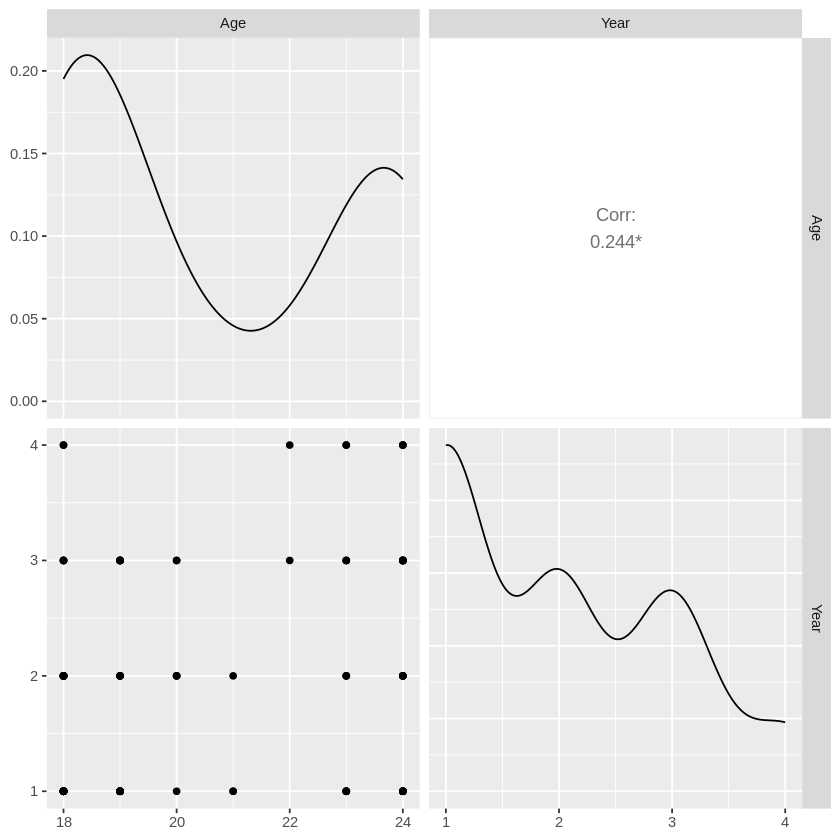

In [ ]:
ggpairs(data[, sapply(data, is.numeric)])

No Outliers

# Year-wise analysis of students from different Courses


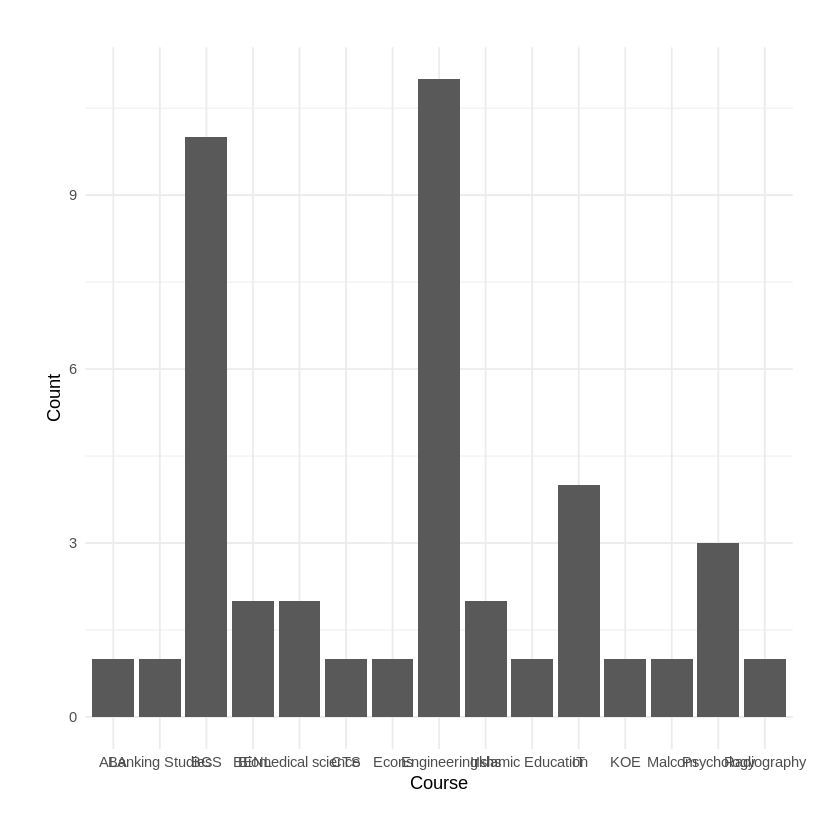

In [ ]:
# Filter data for Year == 1
data_year1 <- subset(data, Year == 1)

# Plot countplot with rotated x-axis labels
ggplot(data_year1, aes(x = Course)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Course", y = "Count") +
  theme_minimal() +
  theme(plot.margin = unit(c(1,1,1,1), "cm"))

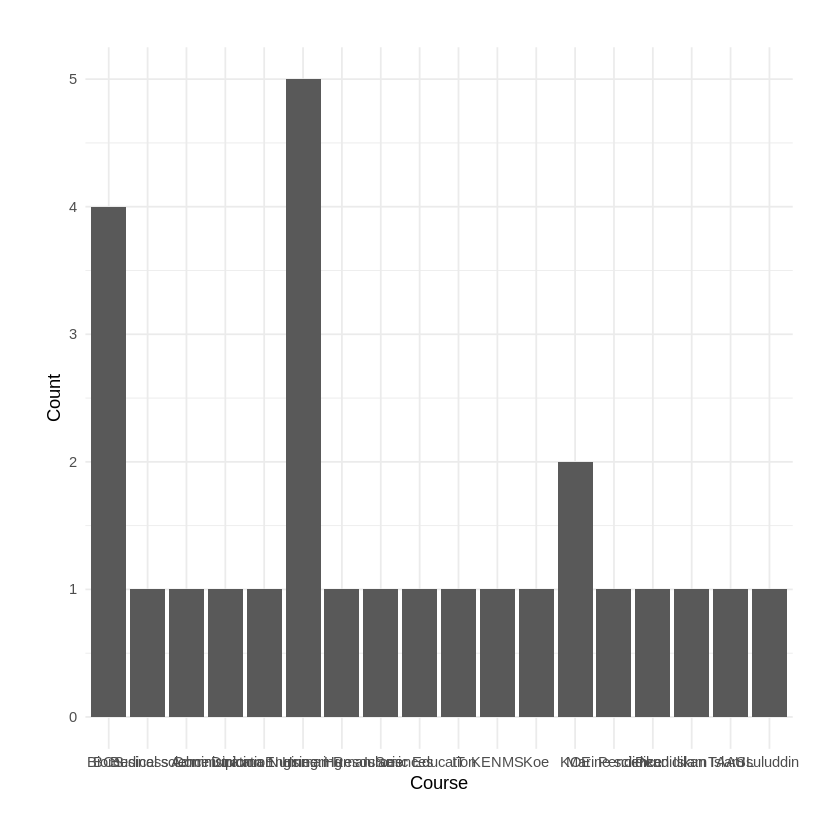

In [ ]:
# Filter data for Year == 2
data_year2 <- subset(data, Year == 2)

# Plot countplot with rotated x-axis labels
ggplot(data_year2, aes(x = Course)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Course", y = "Count") +
  theme_minimal() +
  theme(plot.margin = unit(c(1,1,1,1), "cm"))

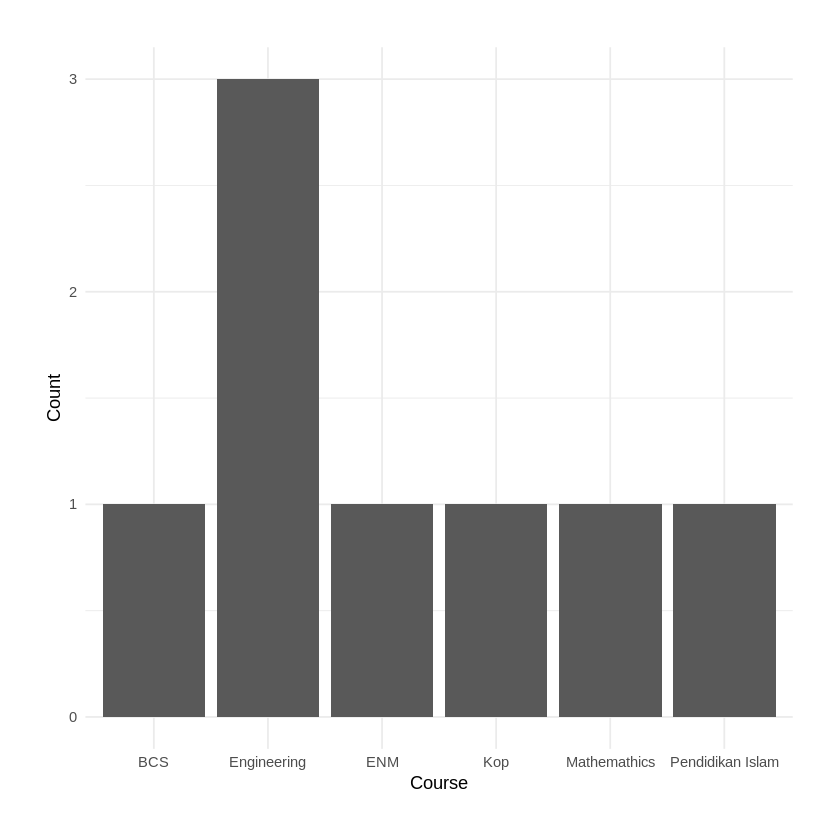

In [ ]:
# Filter data for Year == 4
data_year2 <- subset(data, Year == 4)

# Plot countplot with rotated x-axis labels
ggplot(data_year2, aes(x = Course)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Course", y = "Count") +
  theme_minimal() +
  theme(plot.margin = unit(c(1,1,1,1), "cm"))

Findings -
- Maximum students from Year 4 are from Engineering.
- Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
- Engineering, BCS and IT students rule the survey with maximum number of responses.

# Anxiety vs Course


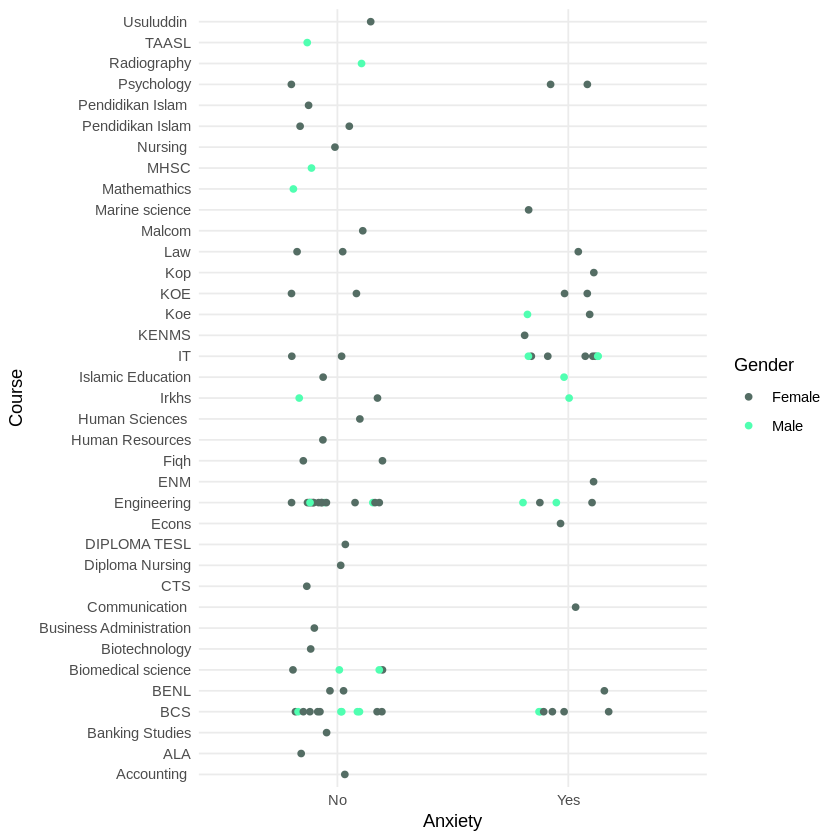

In [ ]:
ggplot(data, aes(x = Anxiety, y = Course, color = Gender)) +
  geom_jitter(width = 0.2, height = 0) +   # jitter adds scatter effect similar to stripplot
  scale_color_manual(values = c("#546D64", "#50FFB1")) +
  theme_minimal() +
  theme(
    legend.position = "right"
  ) +
  labs(x = "Anxiety", y = "Course", color = "Gender")

Here are some of the stats:
- Students enrolled in IT experience the maximum anxiety.
- Students enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.
- Computer Science(BCS) has almost an equal number of students who experience anxiety and those who not.

# Depression Vs Course

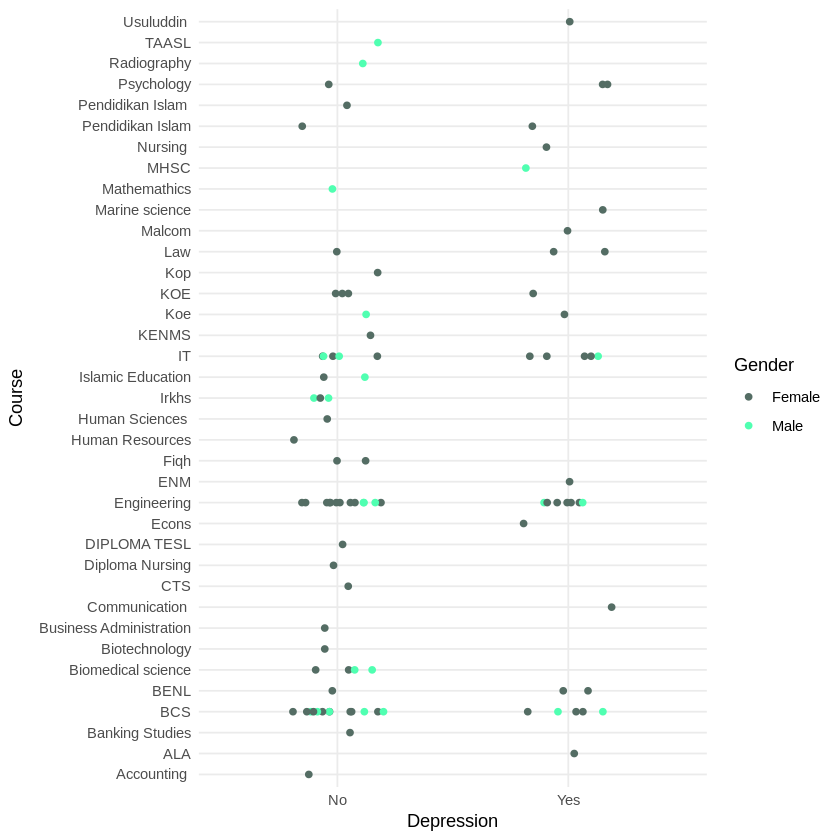

In [ ]:
ggplot(data, aes(x = Depression, y = Course, color = Gender)) +
  geom_jitter(width = 0.2, height = 0) +
  scale_color_manual(values = c("#546D64", "#50FFB1")) +
  theme_minimal() +
  theme(legend.position = "right") +
  labs(x = "Depression", y = "Course", color = "Gender")

Here are some of the stats:
- Males are less prone to experiencing depression as compared to females.
- 2/3 females in Psychology experience depression,... Strange!
- Around 50% of the Students in IT experience depression.

# Panic Attack vs Course


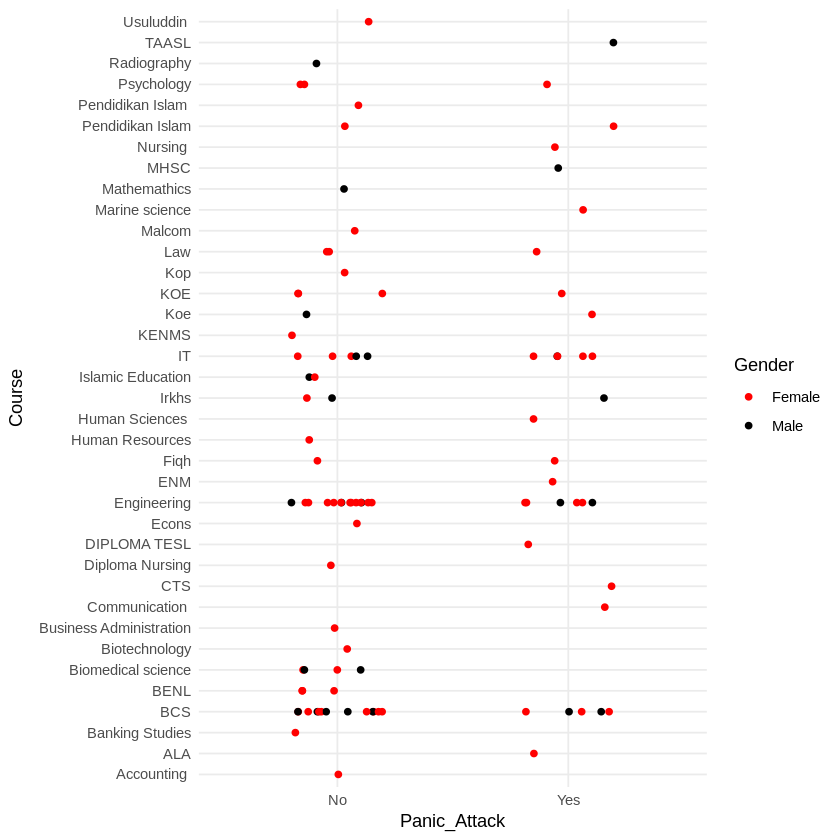

In [ ]:
library(ggplot2)

ggplot(data, aes(x = Panic_Attack, y = Course, color = Gender)) +
  geom_jitter(width = 0.2, height = 0) +
  scale_color_manual(values = c("red", "black")) +
  theme_minimal() +
  theme(legend.position = "right") +
  labs(x = "Panic_Attack", y = "Course", color = "Gender")


Here are some of the stats:
- Males are less prone to experiencing panic attacks as compared to females.
- Approximately 37.5% of Engineering students experience panic attacks.
- About 62.5% of IT students experience panic attacks.
- About 18% of BCS students experience panic attacks.

# Let's analyse various parameters(Depression, Anxiety, Panic_Attack) yearwise.



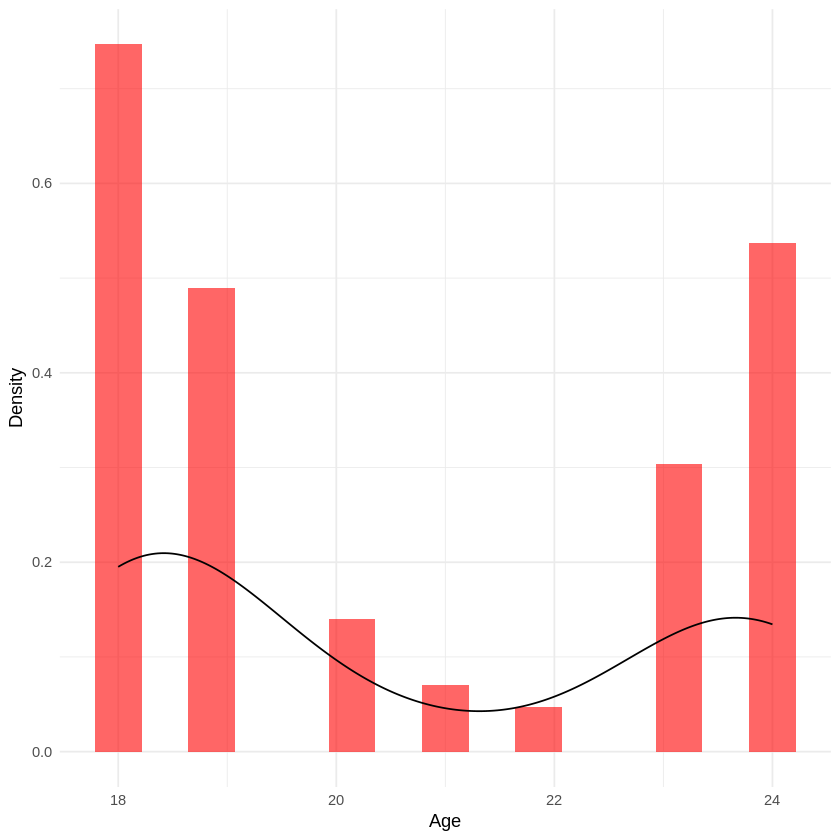

In [ ]:
ggplot(data, aes(x = Age)) +
  geom_histogram(aes(y = ..density..), bins = 15, fill = "red", alpha = 0.6) +
  geom_density(color = "black") +
  theme_minimal() +
  labs(x = "Age", y = "Density")

Few Findings :
- We have students from ages between 18 - 24.
- We do not have much responses from students aged 20-23.

# Let's analyse various parameters(Depression, Anxiety, Panic_Attack) yearwise.



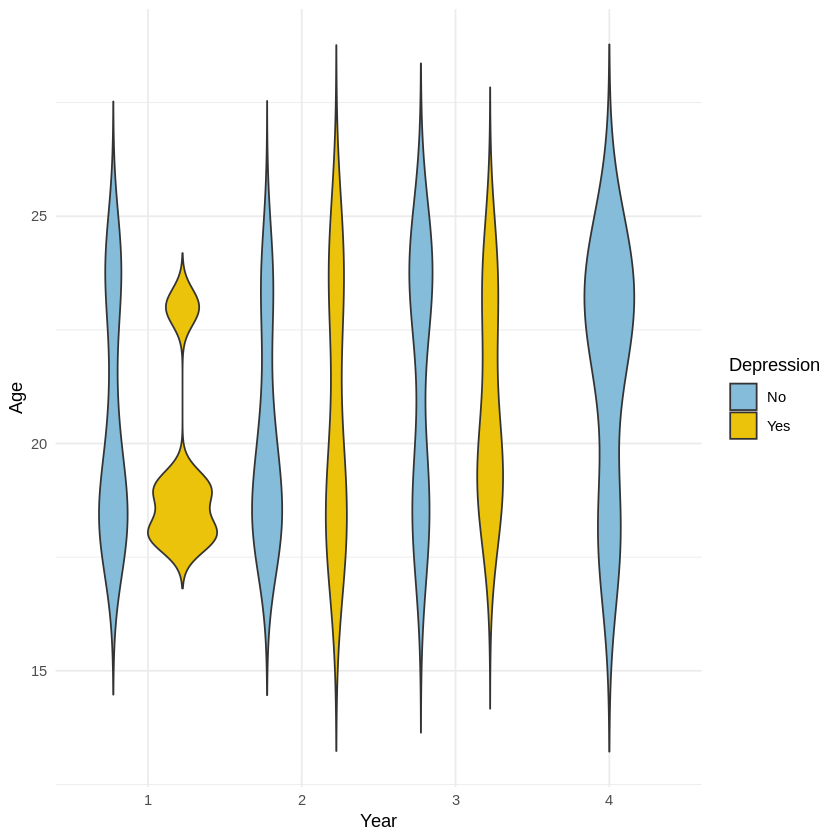

In [ ]:
library(ggplot2)

ggplot(data, aes(x = factor(Year), y = Age, fill = Depression)) +
  geom_violin(trim = FALSE) +
  scale_fill_manual(values = c("#84BCDA", "#ECC30B")) +
  theme_minimal() +
  labs(x = "Year", y = "Age", fill = "Depression")


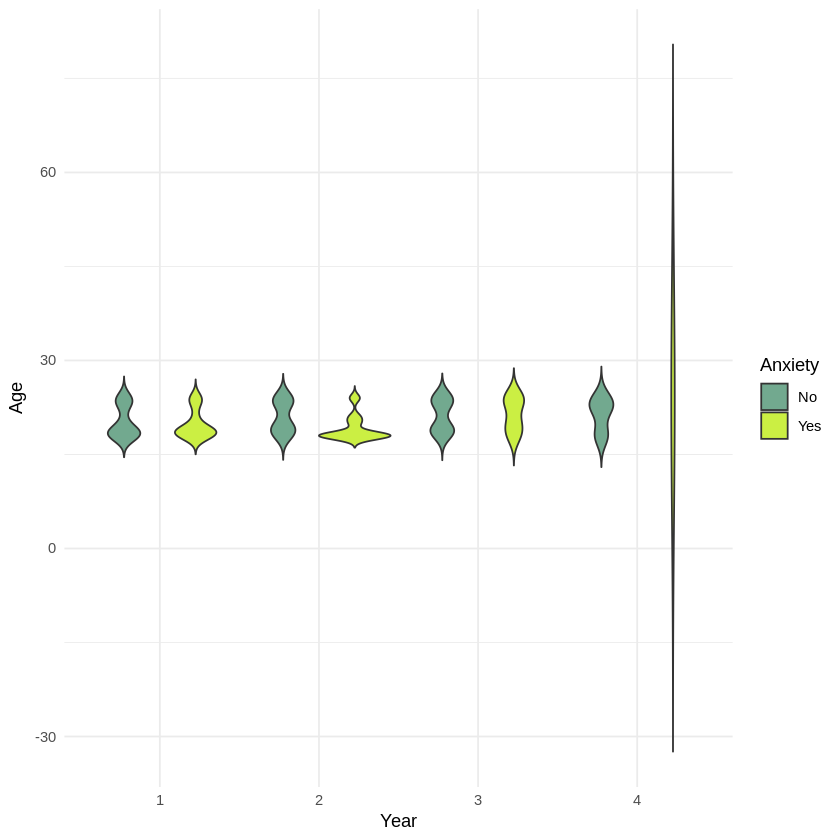

In [ ]:
ggplot(data, aes(x = factor(Year), y = Age, fill = Anxiety)) +
  geom_violin(trim = FALSE, position = position_dodge(width = 0.9)) +
  scale_fill_manual(values = c("#72A98F", "#CBEF43")) +
  theme_minimal() +
  labs(x = "Year", y = "Age", fill = "Anxiety")

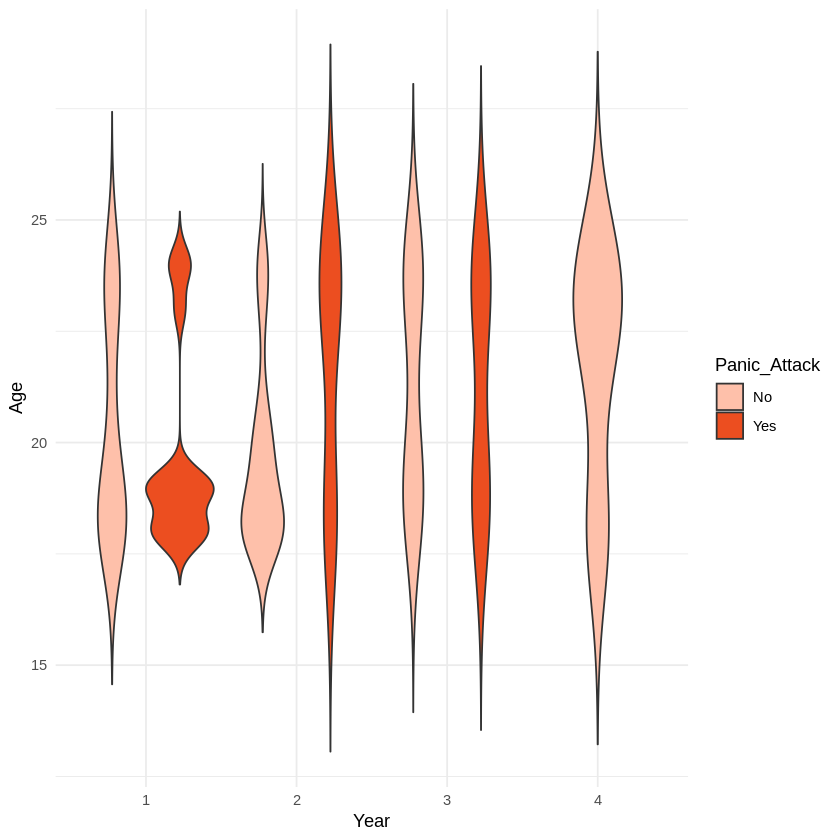

In [ ]:
library(ggplot2)

ggplot(data, aes(x = factor(Year), y = Age, fill = Panic_Attack)) +
  geom_violin(trim = FALSE, position = position_dodge(width = 0.9)) +
  scale_fill_manual(values = c("#FEC0AA", "#EC4E20")) +
  theme_minimal() +
  labs(x = "Year", y = "Age", fill = "Panic_Attack")


Key Findings:
- Year 4 students do not experience Depression, Anxiety or Panic Attacks except for those who are aged 24
- Year 3 has a versatile distribution of students. Mixed reviews.
- Year 1 students aged between 18 - 20 experience the most amongst depression, anxiety, panic attacks.
- Year 3 students are more anxiety prone.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



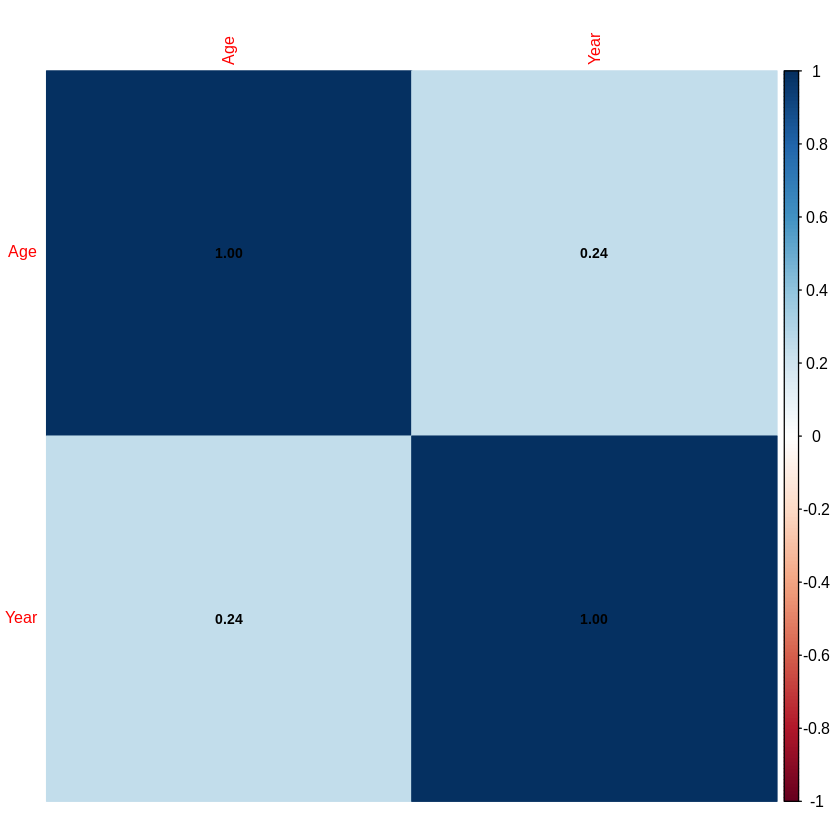

In [ ]:

install.packages("corrplot")
library(corrplot)

# Calculate correlation matrix (numeric columns only)
corrmat <- cor(data[sapply(data, is.numeric)], use = "complete.obs")

# Plot heatmap with annotations
corrplot(corrmat, method = "color", addCoef.col = "black", tl.cex = 0.8, number.cex = 0.7)


# Data Preprocessing

In [ ]:
data$Timestamp <- NULL


In [ ]:
head(data, 20)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
2,Male,21,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
3,Male,19,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
4,Female,22,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
5,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
6,Male,19,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
7,Female,23,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
8,Female,18,BCS,1,3.50 - 4.00,No,No,Yes,No,No
9,Female,19,Human Resources,2,2.50 - 2.99,No,No,No,No,No


In [ ]:
# Convert character columns to factors and then to integer codes
categorical_columns <- names(data)[sapply(data, function(x) is.character(x) | is.factor(x))]

for (col in categorical_columns) {
  data[[col]] <- as.integer(as.factor(data[[col]]))
}

# View first few rows
head(data)


,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,18,14,1,4,1,2,1,2,1
2,2,21,20,2,4,1,1,2,1,1
3,2,19,21,1,4,1,2,2,2,1
4,1,22,26,3,4,2,2,1,1,1
5,2,23,29,4,4,1,1,1,1,1
6,2,19,14,2,5,1,1,1,2,1


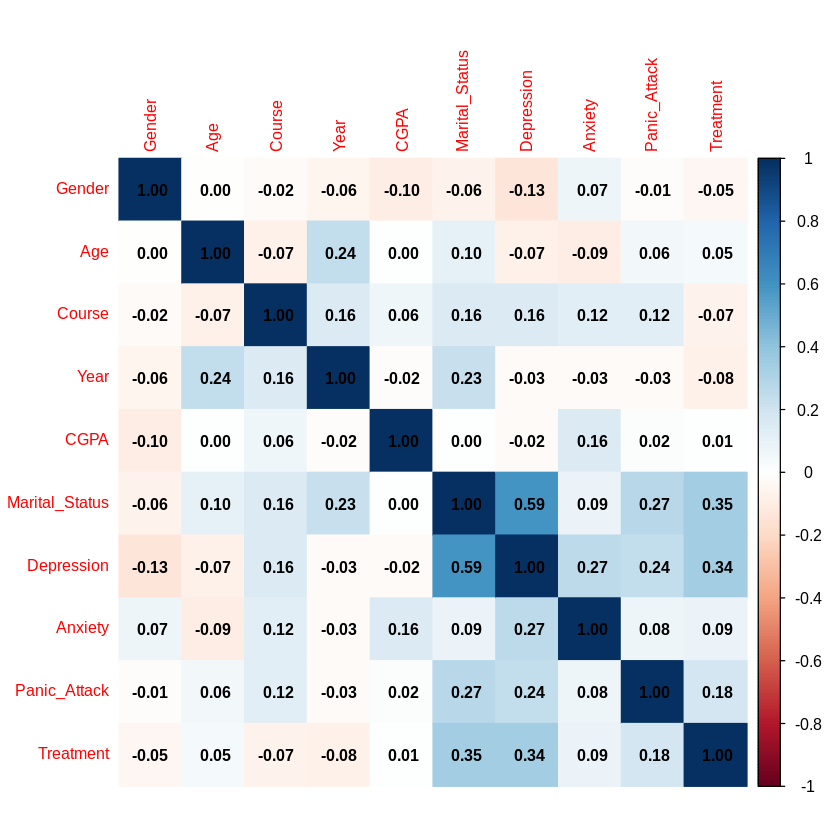

In [ ]:
library(corrplot)

# Compute correlation matrix (numeric columns only)
corrmat <- cor(data[sapply(data, is.numeric)], use = "complete.obs")

# Plot heatmap with annotations and adjusted size
# Size is controlled when saving or plotting device
corrplot(corrmat, method = "color", addCoef.col = "black", tl.cex = 0.8, number.cex = 0.8)


Conclusion:
- Marital_Status shows a close association with Depression.
- Depression. Anxiety, Panick_Attack show a significant correlation.
- Medical assistance(Treatment) shows a slight correlation with Marital_Status

# Model Selection

In [ ]:
X <- data[, !(names(data) %in% "CGPA")]
y <- data$CGPA


In [ ]:
install.packages("caTools")
library(caTools)

set.seed(42)  # for reproducibility
split <- sample.split(y, SplitRatio = 0.7)  # 70% train, 30% test

X_train <- X[split, ]
X_test <- X[!split, ]

y_train <- y[split]
y_test <- y[!split]


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)
set.seed(42)

# Define models for regression
models <- list(
  "Linear Regression" = "lm",
  "Decision Tree" = "rpart",
  "Random Forest" = "rf",
  "SVM" = "svmRadial"
)

# Training control with 10-fold CV
train_control <- trainControl(method = "cv", number = 10)

# Train and evaluate
for (model_name in names(models)) {
  cat("Training", model_name, "...\n")

  model <- train(
    x = X_train,
    y = y_train,
    method = models[[model_name]],
    trControl = train_control,
    preProcess = c("center", "scale"),
    metric = "RMSE"  # or "Rsquared"
  )

  cat(model_name, "RMSE:", mean(model$resample$RMSE, na.rm = TRUE), "\n\n")
}


ERROR: Error in library(caret): there is no package called ‘caret’


# Model Evaluation

In [ ]:
X <- data[, !(names(data) %in% "CGPA")]
y <- as.factor(data$CGPA) # Convert CGPA to a factor for classification

install.packages("caTools")
library(caTools)

set.seed(42)  # for reproducibility
split <- sample.split(y, SplitRatio = 0.7)  # 70% train, 30% test

X_train <- X[split, ]
X_test <- X[!split, ]

y_train <- y[split]
y_test <- y[!split]

# The subsequent model training code for Random Forest will now perform classification
# The warning about regression will disappear

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("kernlab")
library(kernlab)

# Rest of your code for model training
library(caret)
set.seed(42)

# Define models for classification (as y is now a factor)
models <- list(
  # "Linear Regression" = "lm", # lm is a regression model, not suitable for factor y
  "Decision Tree" = "rpart",
  "Random Forest" = "rf",
  "SVM" = "svmRadial" # svmRadial can be used for classification with factor y
)

# Training control with 10-fold CV
train_control <- trainControl(method = "cv", number = 10)

# Train and evaluate
for (model_name in names(models)) {
  cat("Training", model_name, "...\n")

  model <- train(
    x = X_train,
    y = y_train,
    method = models[[model_name]],
    trControl = train_control,
    preProcess = c("center", "scale"),
    # Change metric to a classification metric since y_train is a factor
    metric = "Accuracy" # Use Accuracy or other classification metrics like "Kappa", "F1"
  )

  # For classification, evaluate using accuracy or other relevant metrics
  # The structure of model$resample might change depending on the metric
  # You might need to inspect model$resample to get the correct metric name
  cat(model_name, "Accuracy:", mean(model$resample$Accuracy, na.rm = TRUE), "\n\n")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




ERROR: Error in library(caret): there is no package called ‘caret’


In [ ]:
library(randomForest)

# Train the random forest model
model_rf <- randomForest(x = X_train, y = as.factor(y_train), ntree = 100)

# Predict on test set
pred_rfc <- predict(model_rf, newdata = X_test)

# Calculate accuracy
accuracy <- sum(pred_rfc == y_test) / length(y_test)
print(accuracy)


[1] 0.5666667


In [ ]:
# Load required libraries
library(caret)
install.packages("MLmetrics") # Install the MLmetrics package
library(MLmetrics)
library(e1071)

# Assuming 'y_test' and 'predictions' are defined and factorized
# Convert to factor if needed
y_test <- as.factor(y_test)
# The variable 'predictions' is not defined in the provided code snippets.
# It should be 'pred_rfc' from the previous cell.
predictions <- as.factor(pred_rfc) # Use the predicted values from the model

# Accuracy
accuracy <- Accuracy(y_pred = predictions, y_true = y_test)

# Recall (weighted average)
recall <- Recall(y_pred = predictions, y_true = y_test, positive = NULL)

# Precision (weighted average)
precision <- Precision(y_pred = predictions, y_true = y_test, positive = NULL)

# F1 Score (weighted average)
f1 <- F1_Score(y_pred = predictions, y_true = y_test, positive = NULL)

# Print results
cat("********* Random Forest Results *********\n")
cat("Accuracy    : ", accuracy, "\n")
cat("Recall      : ", recall, "\n")
cat("Precision   : ", precision, "\n")
cat("F1 Score    : ", f1, "\n")

ERROR: Error in library(caret): there is no package called ‘caret’


In [ ]:
library(caret)

conf_mat <- confusionMatrix(predictions, y_test)
print(conf_mat)


ERROR: Error in library(caret): there is no package called ‘caret’


In [ ]:
table(y_test)
table(predictions)

y_test
 1  2  3  4  5 
 1  1  1 13 14 

ERROR: Error: object 'predictions' not found


In [ ]:
# Make sure y_test and predictions are factors with same levels
y_test <- factor(y_test)
predictions <- factor(predictions, levels = levels(y_test))

# Generate confusion matrix and classification report
report <- confusionMatrix(predictions, y_test)

# Print classification metrics
print(report)

ERROR: Error: object 'predictions' not found


In [ ]:
# Load necessary libraries
library(ggplot2)
library(caret)
library(reshape2)

# Create confusion matrix
cm <- confusionMatrix(predictions, y_test)

# Extract table and normalize by total
cf_matrix <- prop.table(cm$table)

# Convert to dataframe for ggplot
cm_df <- as.data.frame(cf_matrix)
colnames(cm_df) <- c("Predicted", "Actual", "Proportion")

# Plot heatmap
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Proportion)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(Proportion, 2)), size = 6) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  theme_minimal(base_size = 15) +
  labs(title = "Confusion Matrix (Proportion)", x = "Actual", y = "Predicted")


ERROR: Error in library(caret): there is no package called ‘caret’


In [ ]:
library(shiny)
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Load your real data
data <- read.csv("Student Mental health.csv")

# Ensure correct column types if needed
data$Year <- as.factor(data$Year)
data$Age <- as.numeric(data$Age)
data$CGPA <- as.numeric(data$CGPA)

ui <- fluidPage(
  titlePanel("Student Mental Health: Age vs Year (Violin Plot)"),
  sidebarLayout(
    sidebarPanel(
      selectInput("yearInput", "Select Year(s):",
                  choices = unique(data$Year),
                  selected = unique(data$Year),
                  multiple = TRUE),
      sliderInput("ageRange", "Select Age Range:",
                  min = floor(min(data$Age, na.rm = TRUE)),
                  max = ceiling(max(data$Age, na.rm = TRUE)),
                  value = c(floor(min(data$Age, na.rm = TRUE)),
                            ceiling(max(data$Age, na.rm = TRUE))))
    ),
    mainPanel(
      plotOutput("violinPlot", height = "500px")
    )
  )
)

server <- function(input, output, session) {

  filteredData <- reactive({
    req(input$yearInput)
    data %>%
      filter(Year %in% input$yearInput,
             Age >= input$ageRange[1],
             Age <= input$ageRange[2])
  })

  output$violinPlot <- renderPlot({
    ggplot(filteredData(), aes(x = Year, y = Age, fill = CGPA)) +
      geom_violin(trim = FALSE, position = position_dodge(width = 0.9)) +
      scale_fill_distiller(palette = "Pastel1", direction = 1) +
      theme_minimal() +
      labs(x = "Year", y = "Age", fill = "CGPA") +
      theme(
        legend.position = "right",
        plot.margin = margin(1, 1, 1, 1, unit = "cm")
      )
  })
}

shinyApp(ui = ui, server = server)


ERROR: Error in `$<-.data.frame`(`*tmp*`, Year, value = structure(integer(0), levels = character(0), class = "factor")): replacement has 0 rows, data has 101
